In [1]:
# Import library/ memasukan library-library yang kita butuhkan seperti pandas,numpy,matplotlib,seaborn,scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#mengimport dataset atau memanggil dataset melalui file yang sudah saya download yaitu "diabetes.csv"

data = pd.read_csv ("diabetes.csv")
df = pd.DataFrame (data)
df.head(100)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
95,6,144,72,27,228,33.9,0.255,40,0
96,2,92,62,28,0,31.6,0.130,24,0
97,1,71,48,18,76,20.4,0.323,22,0
98,6,93,50,30,64,28.7,0.356,23,0


In [3]:
#codingan di bawah ini adalah tahap awal dari EDA(Exploratory Data Snalysis)
#Menampilkan jumlah baris data yang kita miliki dan menampilkan juga jumlah kolom yang kita miliki

print ("Shape of data {}" . format (df.shape))
print ("Number of rows: {}" . format (df.shape [0]))
print ("Number of columns: {}" . format (df.shape [1]))

Shape of data (768, 9)
Number of rows: 768
Number of columns: 9


In [4]:
#untuk menampilkan informasi tentang data yang sudah di tampilkan jumlah baris dan kolom sebelumnya

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# ringkasan statistik deskriptif dari DataFrame pandas

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Menampilkan daftar nama kolom yang ada pada data

df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
# Menampilkan nilai korelasi antar kolom

df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: title={'center': 'Correlation Graph'}>

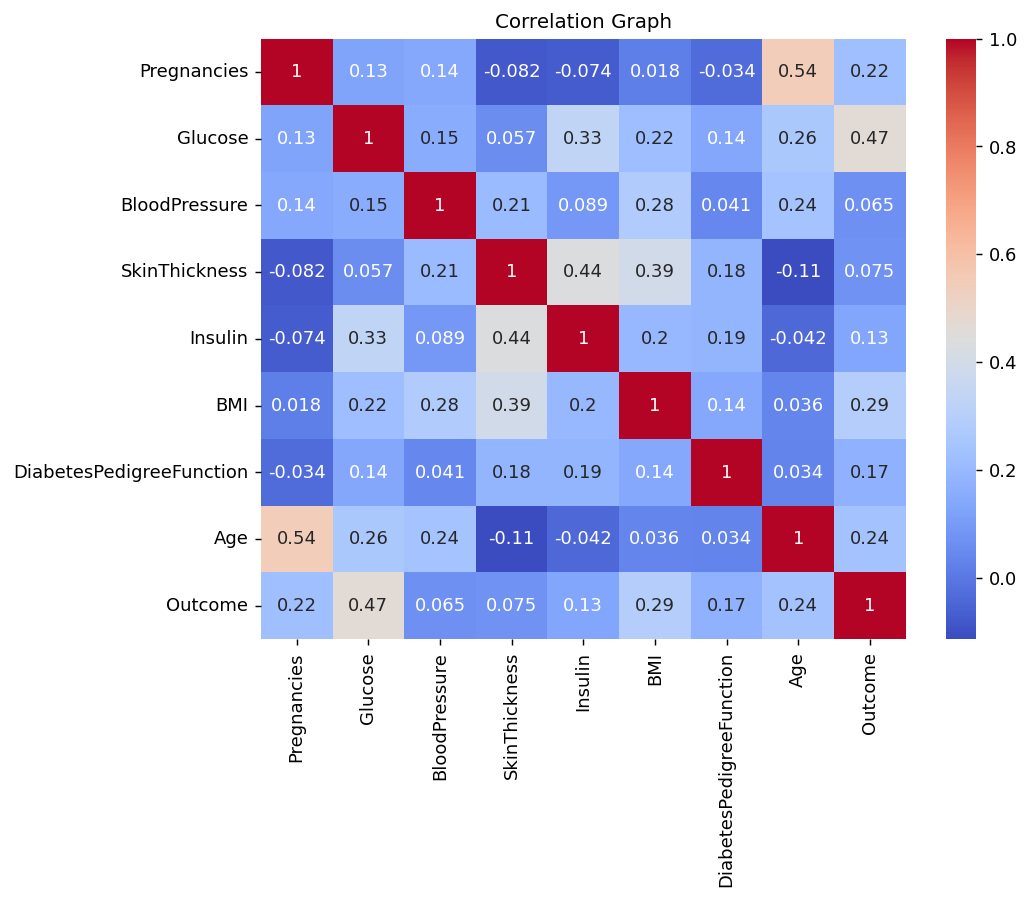

In [8]:
# Memvisualisasikan atau membuat heatmap korelasi menggunakan matplotlib dan seabor

plt.figure (figsize = [8,6],  dpi = 130 )
plt.title ("Correlation Graph" , fontsize = 11 )
sns.heatmap (df.corr(), annot = True , cmap="coolwarm" )

In [9]:
# Mengecek nilai null dan missing value dalam data

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
#  menghitung dan menampilkan jumlah data duplikat dalam DataFrame

print ("Jumlah data duplikat:" , df.duplicated().sum())

Jumlah data duplikat: 0


In [11]:
# Membuat DataFrame X yang berisi fitur-fitur dari data dengan kolom yang sudah ditentukan untuk prediksi diabetes

X = pd.DataFrame (data , columns = ["Pregnancies" , "Glucose" , "BloodPressure" , "SkinThickness" , "Insulin" , "BMI", "DiabetesPedigreeFunction" , "Age"])

# Menentukan nilai y sebagai kolom yang akan diprediksi
# yaitu kolom 'Outcome' yang menunjukkan apakah seseorang diabetes atau tidak

y = data.Outcome

In [12]:
#  Membagi dataset menjadi data training dan testing untuk evaluasi performa model machine learning

X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.25 , random_state = 0)

In [13]:
# Melatih model dengan algoritma Logistic Regression, kenapa memakai algoritma Logistic Regression,
#karena ini lah algoritma yang cocok untuku menentukan apakah seseorang terkena diabetes/ tidak terkena
# algoritma Logistic Regression adalah algoritma yang Digunakan untuk memprediksi probabilitas suatu kejadian biner
logreg = LogisticRegression (solver = "liblinear")

logreg.fit (X_train , y_train)
y_pred = logreg.predict(X_test)
y_predicted_proba = logreg.predict_proba(X_test)

In [14]:
# Menghitung dan menampilkan akurasi model machine learning

print ("Accuracy: " , metrics.accuracy_score (y_test , y_pred))

Accuracy:  0.8072916666666666


In [15]:
# Membuat confusion matrix untuk mengevaluasi performa model Logistic Regression

confusion_matrix (y , logreg.predict (X))

array([[443,  57],
       [120, 148]])

In [16]:
# Menampilkan evaluasi classification report dari model yang dibuat

print (classification_report (y , logreg.predict (X)))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       500
           1       0.72      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.75      0.72      0.73       768
weighted avg       0.76      0.77      0.76       768



In [18]:
# Membuat DataFrame berisi data pasien baru yang akan diprediksi
# Data ini berisi semua fitur yang dibutuhkan model untuk prediksi diabetes, sebagai berikut:

data_baru = pd.DataFrame({
    'Pregnancies': [16],
    'Glucose': [65],
    'BloodPressure': [90],
    'SkinThickness': [50],
    'Insulin': [0],
    'BMI': [25.6],
    'DiabetesPedigreeFunction': [0.357],
    'Age': [70]
})

# Menggunakan model Logistic Regression yang sudah dilatih sebelumnya
# untuk memprediksi apakah pasien baru ini terkena diabetes atau tidak

prediksi_baru = logreg.predict(data_baru)

# Menampilkan hasil prediksi

if prediksi_baru[0] == 1:                # Jika prediksinya = 1 (pasien terdeteksi diabetes)
    print("Hasil prediksi: Diabetes")
else:                                       # Jika prediksinya = 0 (pasien terdeteksi tidak diabetes)

    print("Hasil prediksi: Tidak Diabetes")

Hasil prediksi: Tidak Diabetes
